In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

Checking all the files, 18 in total. I decided to work with 7 of them: daily activity, heart_rate, intensity, steps, sleep, weight, calories.

## Working with activity file. 32 participants

In [514]:
activity=pd.read_csv('../Data/raw/dailyActivity_merged.csv')
activity.shape
#activity.info() #940 entries.15 columns
activity.drop_duplicates() #after dropping duplicates still 940 rows, so no duplicates.
# In this file we have Very Active,Fairly Active and Ligthly Active Minutes. I want to add a column to have all active min-s
activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [289]:
activity['ActiveMinutes']=activity['VeryActiveMinutes']+activity['FairlyActiveMinutes']+activity['LightlyActiveMinutes']
activity.head()
activity['Id'].nunique() # we have 33 unique Id, 33 participants

33

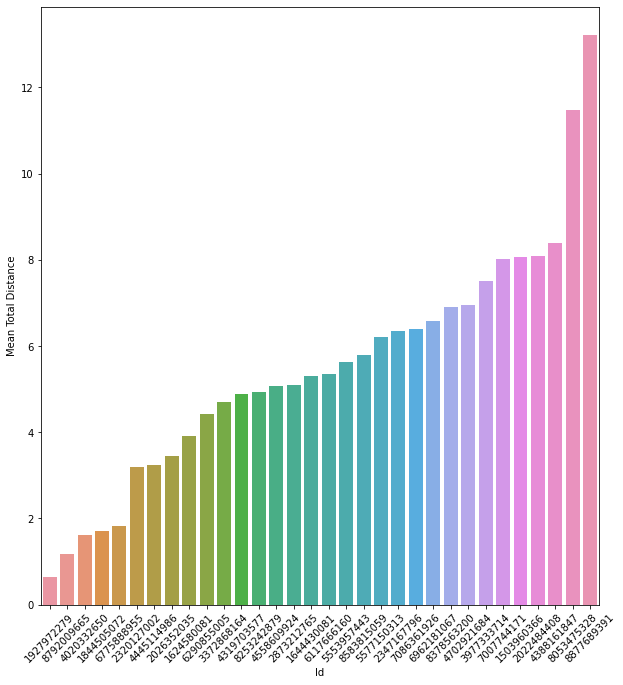

<Figure size 432x288 with 0 Axes>

In [496]:
#I am calculating here a mean TotalDistance and look how this average value spread along the customers.
total_distance_mean = activity.sort_values(by=["Id","TotalDistance"]).groupby("Id").agg({"TotalDistance":"mean"}).reset_index()
total_distance_mean
plt.figure(figsize=(10,11))
#order=
sns.barplot(data=total_distance_mean, x='Id', y="TotalDistance", order=total_distance_mean.sort_values('TotalDistance').Id);   
plt.xticks(rotation=45)
plt.ylabel('Mean Total Distance');
plt.show()
plt.savefig("../images/avg_distance_by_id.jpg",dpi=1000)

In [290]:
activity.shape #940 *15

(940, 16)

In [291]:
#checking for NaN values
activity.isna().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
ActiveMinutes               0
dtype: int64

In [292]:
Null_data = activity[(activity['Calories'] == 0) & (activity['TotalSteps'] == 0) & (activity['ActiveMinutes'] ==0)]
#Null_data.shape #4 rows are without activities
Null_data #1440 minutes=60*24 - sedentary minutes, probably the device wasn't used, we can drop these rows
activity=activity.drop(Null_data.index,axis=0)
activity.shape # we dropped 4 rows, now we have 936

(936, 16)

In [293]:
activity.info() #ActivityDate is an object, we need to make it DateTime

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 939
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        936 non-null    int64  
 1   ActivityDate              936 non-null    object 
 2   TotalSteps                936 non-null    int64  
 3   TotalDistance             936 non-null    float64
 4   TrackerDistance           936 non-null    float64
 5   LoggedActivitiesDistance  936 non-null    float64
 6   VeryActiveDistance        936 non-null    float64
 7   ModeratelyActiveDistance  936 non-null    float64
 8   LightActiveDistance       936 non-null    float64
 9   SedentaryActiveDistance   936 non-null    float64
 10  VeryActiveMinutes         936 non-null    int64  
 11  FairlyActiveMinutes       936 non-null    int64  
 12  LightlyActiveMinutes      936 non-null    int64  
 13  SedentaryMinutes          936 non-null    int64  
 14  Calories  

In [294]:
activity['ActivityDate']=pd.to_datetime(activity['ActivityDate'])

In [295]:
activity.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActiveMinutes
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,366
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,257
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,222
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,272
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,267
5,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,222
6,1503960366,2016-04-18,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921,291
7,1503960366,2016-04-19,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035,345
8,1503960366,2016-04-20,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786,245
9,1503960366,2016-04-21,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775,238


In [296]:
activity_total=activity.groupby(['Id']).sum() #. It's a data for the whole month, keep it for a bit.
activity_total.head()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActiveMinutes
Id,,,,,,,,,,,,,,
1503960366,375619,242.099999,242.099999,0.0,88.61,24.62,128.740000,0.00,1200,594,6818,24853,56309,8612
1624580081,178061,121.360001,121.360001,0.0,29.12,11.18,80.810000,0.19,269,180,4758,38990,45984,5207
1644430081,218489,158.860001,158.860001,0.0,21.90,28.53,108.270001,0.12,287,641,5354,34856,84339,6282
1844505072,79982,52.890000,52.890000,0.0,0.26,1.52,51.069999,0.00,4,40,3579,37405,48778,3623
1927972279,28400,19.670000,19.670000,0.0,2.97,0.97,15.720000,0.00,41,24,1196,40840,67357,1261


In [297]:
activity_pivot=activity.pivot_table(index=['Id'],values=['TotalSteps'],aggfunc=['count'])
activity_pivot
#in this table we can see how much data per customer we have.
#on average 30-31 rows.Probably worth removing the customer -4057192912, as it has only 4 days in his total.


,count
,TotalSteps
Id,
1503960366,30
1624580081,31
1644430081,30
1844505072,31
1927972279,31
2022484408,31
2026352035,31
2320127002,31


In [298]:
data_4_days = activity[(activity['Id'] == 4057192912)]
#it's an Id with 4 days activity only
activity=activity.drop(data_4_days.index,axis=0)
activity.shape #932 rows now

(932, 16)

In [497]:
activity.to_csv("../Data/cleaned/cleaned_activity.csv",index=False)

In [299]:
activity['DayOfWeek'] = activity['ActivityDate'].apply(lambda time: time.dayofweek)
activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActiveMinutes,DayOfWeek
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,366,1
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,257,2
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,222,3
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,272,4
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,267,5


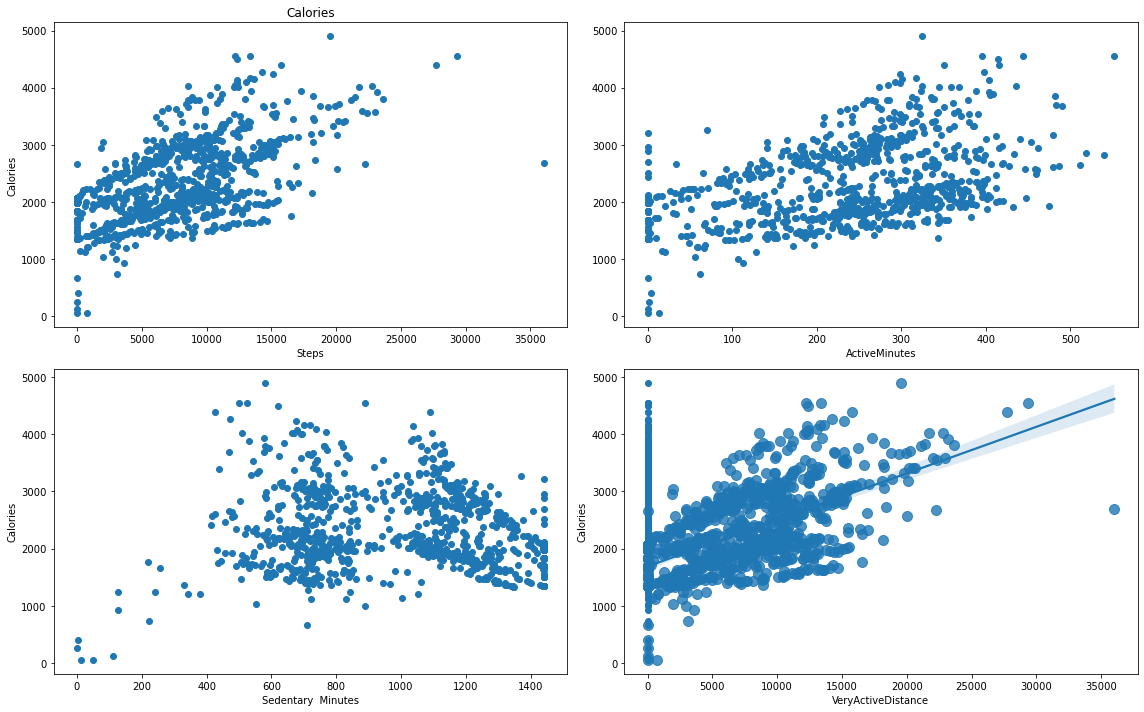

In [325]:
fig, ax = plt.subplots(2,2,figsize=(16,10))
ax[0,0].scatter(activity['TotalSteps'], activity['Calories'])
sns.regplot(x = activity['TotalSteps'], y = activity['Calories'], data = activity, marker='o',scatter_kws={'s':100})
ax[0,0].set_xlabel("Steps")
ax[0,0].set_ylabel("Calories")
ax[0,0].set_title("Calories")
    
ax[1,0].scatter(activity['SedentaryMinutes'], activity['Calories'])
ax[1,0].set_xlabel("Sedentary  Minutes")
ax[1,0].set_ylabel("Calories")
 
ax[0,1].scatter(activity['ActiveMinutes'],activity['Calories'])
ax[0,1].set_xlabel("ActiveMinutes")
ax[1,1].scatter(activity['VeryActiveDistance'],activity['Calories'])
ax[1,1].set_xlabel("VeryActiveDistance")
plt.tight_layout()
plt.show()
#sns.regplot(x = 'sum_x', y = 'sum_y', data = merged_sleep_ne_intensity, marker='o',scatter_kws={'s':100})
#plt.ylabel('Intensity Minutes');
#plt.xlabel('Total minutes asleep for undersleeping group');
#plt.show()


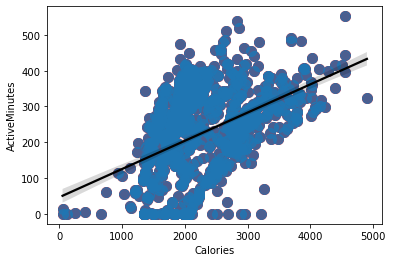

In [336]:
activity.plot.scatter(x = 'Calories', y = 'ActiveMinutes', color='red', s = 100);#this are data grouped by id
sns.regplot(x = activity['Calories'], y = activity['ActiveMinutes'], data = activity, scatter_kws={'s':100}, line_kws={"color": "black"})
plt.savefig("../images/calories_activ_min.png",dpi=300)


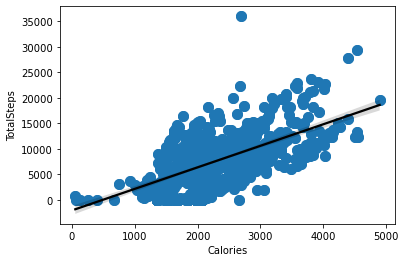

In [432]:
activity.plot.scatter(x = 'Calories', y = 'TotalSteps', s = 100);
sns.regplot(x = activity['Calories'], y = activity['TotalSteps'], data = activity, scatter_kws={'s':100}, line_kws={"color": "black"})
plt.savefig("../images/calories_total_steps.png",dpi=300)

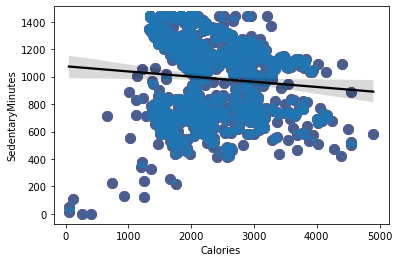

In [433]:
activity.plot.scatter(x = 'Calories', y = 'SedentaryMinutes', color='red', s = 100);#this are data grouped by id
sns.regplot(x = activity['Calories'], y = activity['SedentaryMinutes'], data = activity, scatter_kws={'s':100}, line_kws={"color": "black"});
#plt.savefig("../images/calories_activ_min.png",dpi=300)
plt.savefig("../images/calories_sedent_minutes.png",dpi=300)

In [ ]:
#looking at this histogram I come to a feeling, that the left side is represented so well, because people
#don't use the devise regularly, otherwise we would see more of normal distribution.

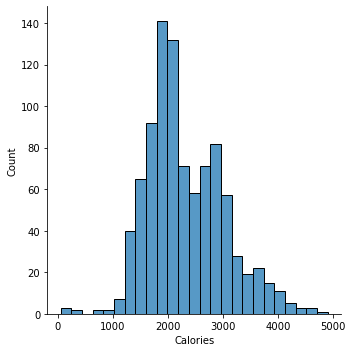

In [272]:
sns.displot(activity, x='Calories');

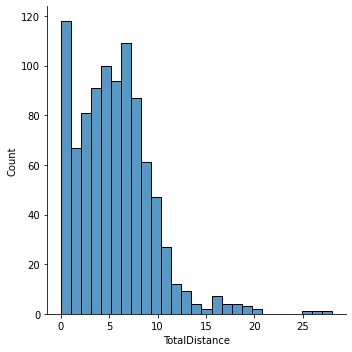

In [271]:
sns.displot(activity,x="TotalDistance");

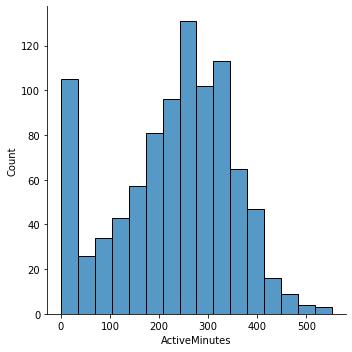

In [268]:
sns.displot(activity, x="ActiveMinutes");

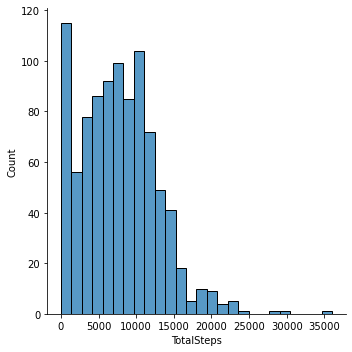

In [267]:

sns.displot(activity, x="TotalSteps");

In [301]:
activity["Day_of_week"] = activity["ActivityDate"].dt.day_name()

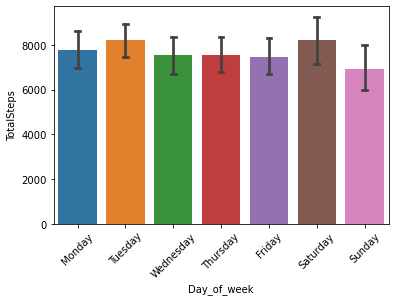

In [434]:
# Plot barchart DayOfWeek against TotalSteps 
activity_by_week_day = sns.barplot(x="Day_of_week", y="TotalSteps", data=activity, 
                                   order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
                                   capsize=.1)
plt.xticks(rotation=45);
plt.savefig("../images/totalsteps_dayofweek",dpi=300)

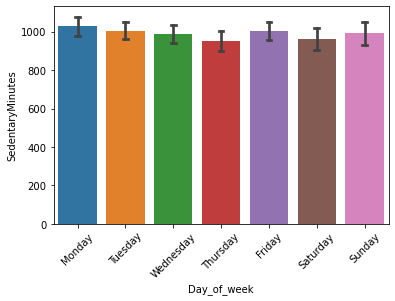

In [345]:
# Plot barchart DayOfWeek against Sedentary Minutes.Not interesting this one
activity_by_week_day = sns.barplot(x="Day_of_week", y="SedentaryMinutes", data=activity, 
                                   order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
                                   capsize=.1)
plt.xticks(rotation=45);

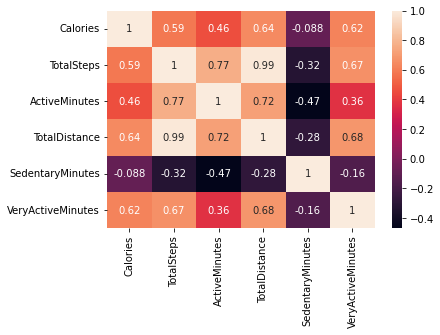

<Figure size 432x288 with 0 Axes>

In [435]:
for_corr_matrix=pd.concat([activity[["Calories"]], activity[['TotalSteps']],activity[['ActiveMinutes']], activity[['TotalDistance']], activity[['SedentaryMinutes']], activity[['VeryActiveMinutes']]],axis=1)
correlations_matrix = for_corr_matrix.corr()
correlations_matrix
sns.heatmap(correlations_matrix, annot=True) # annot = True displays the correlation values, annot=False hides the correlation values
plt.show()
plt.savefig("../images/corre_matrix.png",dpi=300)
#it's interesting thing here we can see better correlation of calories wuth totaldistance
#and with active minutes.

## Working with heart rate. 13 participants

In [515]:
#with parse_dates=[1] we read this column as dates. so no need to transfer it later into datetime value
heart_rate=pd.read_csv('../Data/raw/heartrate_seconds_merged.csv',parse_dates=[1],dayfirst=False)
heart_rate.head() 

,Id,Time,Value
0,2022484408,2016-04-12 07:21:00,97
1,2022484408,2016-04-12 07:21:05,102
2,2022484408,2016-04-12 07:21:10,105
3,2022484408,2016-04-12 07:21:20,103
4,2022484408,2016-04-12 07:21:25,101


In [20]:
heart_rate.isna().sum() #No NaN values, good.
heart_rate.drop_duplicates() #2483658 rows × 3 columns. no duplicates
heart_rate_total=heart_rate.groupby(['Id']).count() 
heart_rate_total
#customer with Id 2026352035 has a total value - 2490, should be removed

,Time,Value
Id,,
2022484408,154104,154104
2026352035,2490,2490
2347167796,152683,152683
4020332650,285461,285461
4388161847,249748,249748
4558609924,192168,192168
5553957443,255174,255174
5577150313,248560,248560
6117666160,158899,158899


In [21]:
data_small = heart_rate[(heart_rate['Id'] == 2026352035)]
#it's an Id with small value, not enough info
heart_rate=heart_rate.drop(data_small.index,axis=0)
heart_rate.shape 

(2481168, 3)

In [22]:
heart_rate["Day_of_week"] = heart_rate["Time"].dt.day_name()

In [23]:
heart_rate["Hour"] = heart_rate["Time"].dt.hour

In [24]:
heart_rate["Day_of_week_number"] = heart_rate["Time"].dt.weekday

In [25]:
heart_rate.head()

,Id,Time,Value,Day_of_week,Hour,Day_of_week_number
0,2022484408,2016-04-12 07:21:00,97,Tuesday,7,1
1,2022484408,2016-04-12 07:21:05,102,Tuesday,7,1
2,2022484408,2016-04-12 07:21:10,105,Tuesday,7,1
3,2022484408,2016-04-12 07:21:20,103,Tuesday,7,1
4,2022484408,2016-04-12 07:21:25,101,Tuesday,7,1


In [26]:
heart_rate.to_csv("../Data/Fitabase/heart_rate_with_weekdays.csv",index=False)

In [27]:
heart_rate["Id"].nunique() #we had 14 participants, now - 13, 1 -removed

13

In [28]:
df_aggregated = heart_rate.groupby(["Id","Day_of_week","Hour"])["Value"].agg(["sum","median","mean","min","max"]).reset_index()
df_aggregated.head() #we aggregate the value

,Id,Day_of_week,Hour,sum,median,mean,min,max
0,2022484408,Friday,6,15533,66.0,66.380342,57,117
1,2022484408,Friday,7,41417,86.0,86.465553,57,121
2,2022484408,Friday,8,88445,67.0,71.211755,51,104
3,2022484408,Friday,9,215823,110.0,108.236209,62,189
4,2022484408,Friday,10,149485,87.0,88.191740,61,137


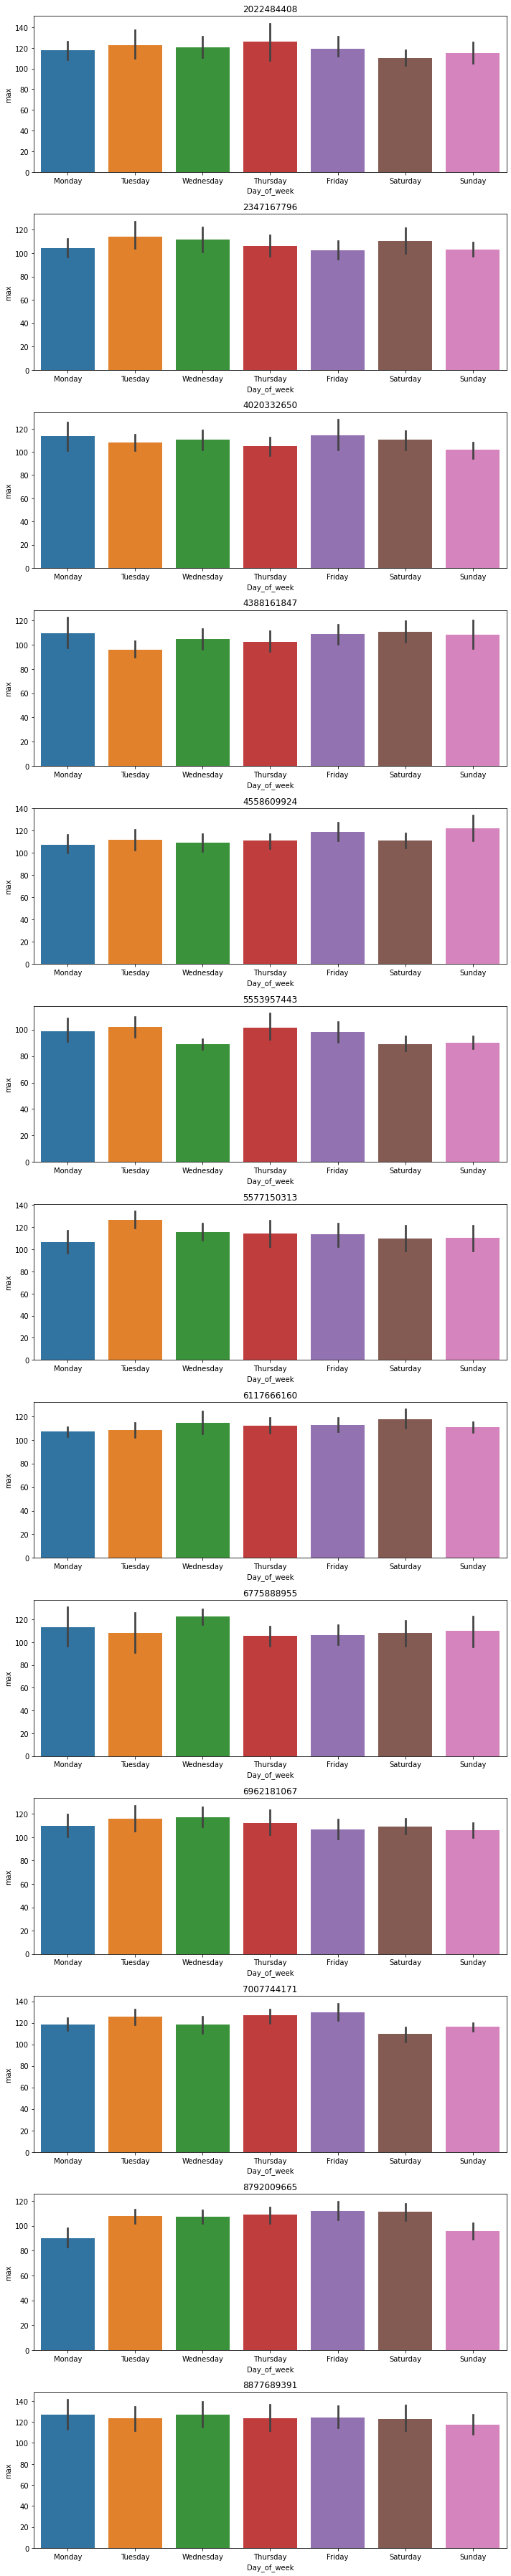

In [318]:
fig, ax = plt.subplots(13,1, figsize=(10,50))
for index,user in enumerate(df_aggregated["Id"].unique()):
    sns.barplot(data=df_aggregated[df_aggregated["Id"]==user], x="Day_of_week",y="max",
             order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],ax=ax[index]).set_title(user);
plt.tight_layout()
plt.show()
#Day of week and median heart rate per customer.

In [441]:
df_aggregated_no_hour = heart_rate.groupby(["Id","Day_of_week"])["Value"].agg(["sum","median","mean","min","max"]).reset_index()
df_aggregated_no_hour.head()

,Id,Day_of_week,sum,median,mean,min,max
0,2022484408,Friday,1718984,78.0,81.360470,50,189
1,2022484408,Monday,1889554,76.0,80.529918,49,159
2,2022484408,Saturday,1161447,73.0,75.403947,49,136
3,2022484408,Sunday,1224070,76.0,79.697246,44,163
4,2022484408,Thursday,2110762,75.0,78.347574,50,203


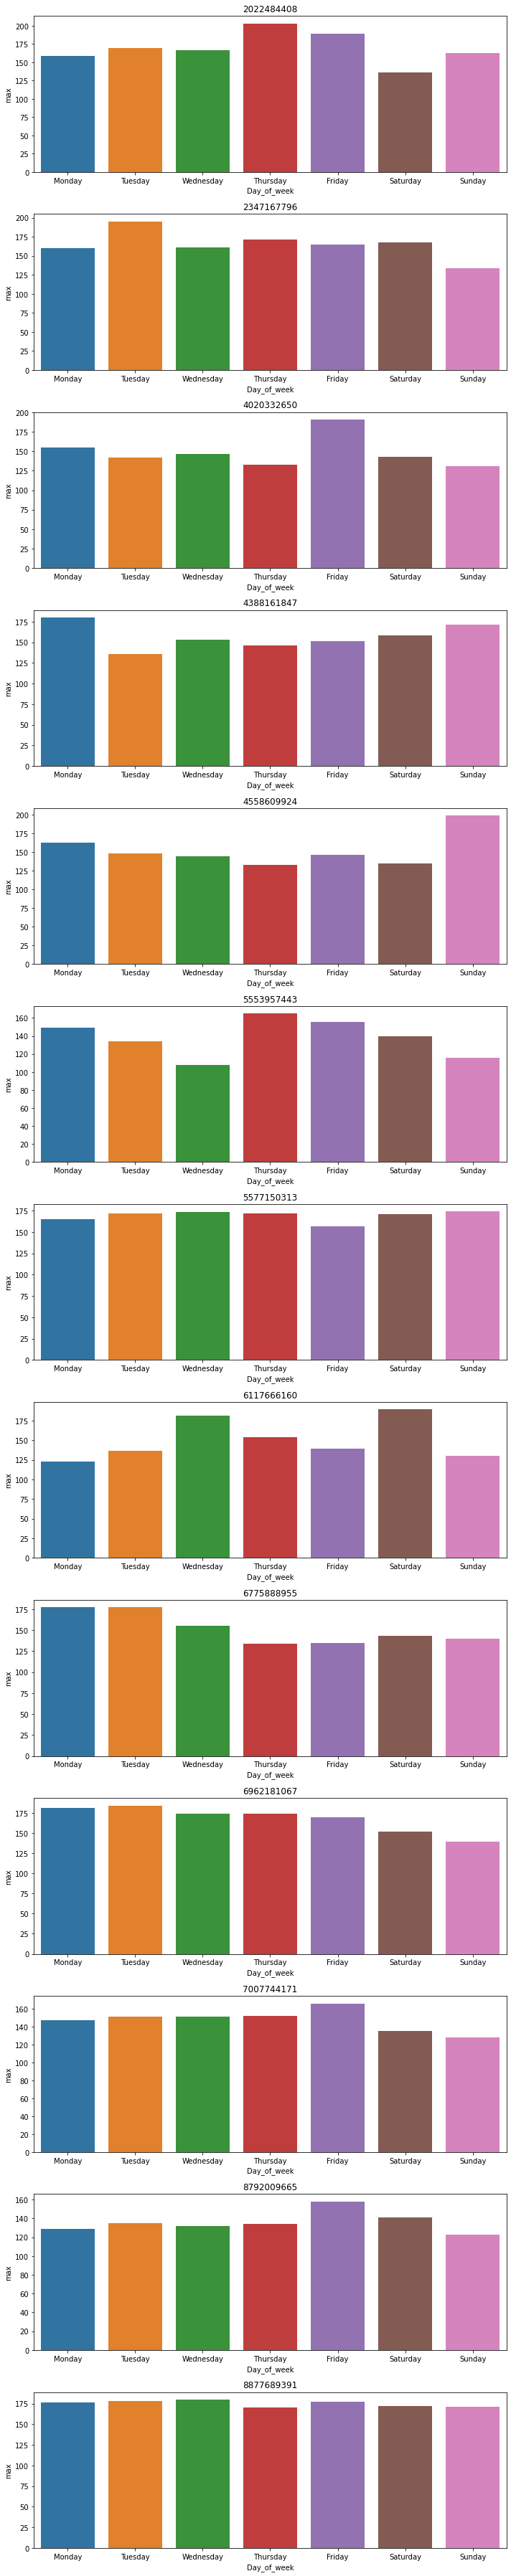

In [442]:
fig, ax = plt.subplots(13,1, figsize=(10,50))
for index,user in enumerate(df_aggregated_no_hour["Id"].unique()):
    sns.barplot(data=df_aggregated_no_hour[df_aggregated_no_hour["Id"]==user], x="Day_of_week",y="max",
             order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],ax=ax[index]).set_title(user);
plt.tight_layout()
plt.show()

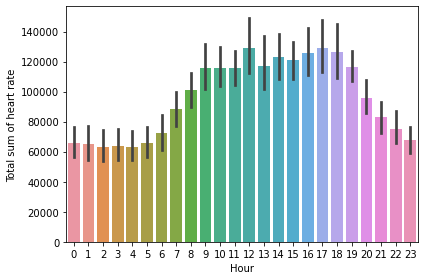

<Figure size 432x288 with 0 Axes>

In [443]:
#Heart rate by hour, all customers
sns.barplot(data=df_aggregated, x="Hour",y="sum");      
plt.ylabel('Total sum of heart rate')
plt.xlabel('Hour')
plt.tight_layout()
plt.show()
plt.savefig("../images/heart_rate_per_hour.png",dpi=300)


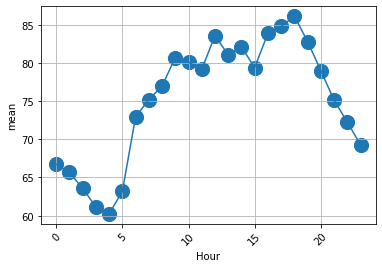

In [321]:
#it's aggregated plot for every customer, I grouped by Hour. 
#So we can see that the heart rate grows when they wake up. After there is a little growth in the afternoon and around 18
#probably after work.
df_aggregated_time = heart_rate.groupby(["Hour"])["Value"].agg(["sum","median","mean","min","max"]).reset_index()
df_aggregated_time.head()
df_aggregated_time.plot.scatter(x = 'Hour', y = 'mean', s = 200)
plt.plot(df_aggregated_time['Hour'],df_aggregated_time['mean'])
plt.grid(zorder=0)
plt.xticks(rotation=45);

In [32]:
df_aggregated_dayweek_hr =heart_rate.groupby(["Day_of_week"])["Value"].agg(["sum","median","mean","min","max"]).reset_index()
df_aggregated_dayweek_hr
#all customers grouped, to see the whole picture

,Day_of_week,sum,median,mean,min,max
0,Friday,27720986,73.0,77.520836,39,191
1,Monday,22223157,73.0,77.307080,41,181
2,Saturday,27062659,77.0,79.973815,40,189
3,Sunday,21788455,72.0,75.929867,39,199
4,Thursday,27667136,73.0,77.035902,40,203
5,Tuesday,34839545,73.0,77.013723,40,195
6,Wednesday,30521917,72.0,76.451580,36,181


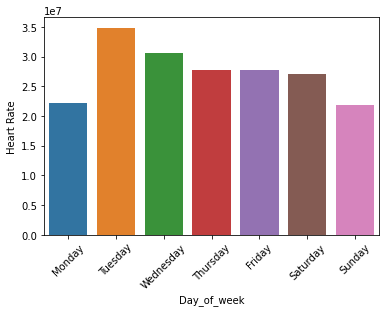

In [437]:
sns.barplot(data=df_aggregated_dayweek_hr, x="Day_of_week",y="sum",
             order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]);
plt.xticks(rotation=45)
plt.ylabel('Heart Rate');
#Heart rate is the highest on Tuesday
plt.savefig("../images/heart_rate_per_week_day.png",dpi=300)

## working with intensity. 33 participants

In [516]:
intensity=pd.read_csv('../Data/raw/hourlyIntensities_merged.csv',parse_dates=[1],dayfirst=False)
intensity.head()
#It shows how many active minutes people had in 1 hour
#Value calculated by adding all the minute-level intensity values that occurred within the hour..

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,2016-04-12 00:00:00,20,0.333333
1,1503960366,2016-04-12 01:00:00,8,0.133333
2,1503960366,2016-04-12 02:00:00,7,0.116667
3,1503960366,2016-04-12 03:00:00,0,0.000000
4,1503960366,2016-04-12 04:00:00,0,0.000000


In [35]:
intensity.isna().sum()

Id                  0
ActivityHour        0
TotalIntensity      0
AverageIntensity    0
dtype: int64

In [36]:
intensity.shape #22099

(22099, 4)

In [37]:
intensity.drop_duplicates() #22099 - no duplicates

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,2016-04-12 00:00:00,20,0.333333
1,1503960366,2016-04-12 01:00:00,8,0.133333
2,1503960366,2016-04-12 02:00:00,7,0.116667
3,1503960366,2016-04-12 03:00:00,0,0.000000
4,1503960366,2016-04-12 04:00:00,0,0.000000
...,...,...,...,...
22094,8877689391,2016-05-12 10:00:00,12,0.200000
22095,8877689391,2016-05-12 11:00:00,29,0.483333
22096,8877689391,2016-05-12 12:00:00,93,1.550000
22097,8877689391,2016-05-12 13:00:00,6,0.100000


In [501]:
Null_data_a = intensity[(intensity['TotalIntensity'] == 0) & (intensity['AverageIntensity'] == 0)]

Null_data_a 
intensity_clean=intensity.drop(Null_data_a.index,axis=0)
intensity_clean.shape 
#I didn't decide if I should remove it or not....9050 lines, it's almost half of this data set.probably it won't change the data

(12961, 6)

In [508]:
intensity_clean.to_csv("../Data/cleaned/cleaned_intensity.csv",index=False)

In [38]:
intensity['Id'].nunique() #we have data for all 33 participants

33

In [502]:
intensity_clean['Id'].nunique()

32

In [376]:
data_small_a = intensity[(intensity['Id'] == 4057192912)] #88 rows..remove?
#it's an Id with small value, not enough info
intensity=intensity.drop(data_small_a.index,axis=0)
intensity.shape  ##22011 rows, 88 rows less, 32-participants

(22011, 4)

In [377]:
intensity['Hour']=intensity['ActivityHour'].dt.hour
intensity["Day_of_week"] = intensity["ActivityHour"].dt.day_name()
intensity.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity,Hour,Day_of_week
0,1503960366,2016-04-12 00:00:00,20,0.333333,0,Tuesday
1,1503960366,2016-04-12 01:00:00,8,0.133333,1,Tuesday
2,1503960366,2016-04-12 02:00:00,7,0.116667,2,Tuesday
3,1503960366,2016-04-12 03:00:00,0,0.000000,3,Tuesday
4,1503960366,2016-04-12 04:00:00,0,0.000000,4,Tuesday


In [503]:
intensity_clean['Hour']=intensity_clean['ActivityHour'].dt.hour
intensity_clean["Day_of_week"] = intensity_clean["ActivityHour"].dt.day_name()
intensity_clean.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity,Hour,Day_of_week
0,1503960366,2016-04-12 00:00:00,20,0.333333,0,Tuesday
1,1503960366,2016-04-12 01:00:00,8,0.133333,1,Tuesday
2,1503960366,2016-04-12 02:00:00,7,0.116667,2,Tuesday
8,1503960366,2016-04-12 08:00:00,13,0.216667,8,Tuesday
9,1503960366,2016-04-12 09:00:00,30,0.500000,9,Tuesday


In [438]:
df_aggregated_int = intensity.groupby(["Id","Day_of_week"])['TotalIntensity'].agg(["sum","median","mean","min","max"]).reset_index()
df_aggregated_int.head() #we aggregate the value

,Id,Day_of_week,sum,median,mean,min,max
0,1503960366,Friday,1434,8.0,14.937500,0,159
1,1503960366,Monday,1650,10.0,17.187500,0,132
2,1503960366,Saturday,1595,7.5,16.614583,0,108
3,1503960366,Sunday,1449,8.0,15.093750,0,131
4,1503960366,Thursday,1399,8.5,14.572917,0,113


In [505]:
df_aggregated_int_clean = intensity_clean.groupby(["Id","Day_of_week"])['TotalIntensity'].agg(["sum","median","mean","min","max"]).reset_index()
df_aggregated_int_clean.head()

,Id,Day_of_week,sum,median,mean,min,max
0,1503960366,Friday,1434,13.0,19.916667,1,159
1,1503960366,Monday,1650,13.0,22.297297,1,132
2,1503960366,Saturday,1595,11.0,20.714286,1,108
3,1503960366,Sunday,1449,12.0,21.000000,1,131
4,1503960366,Thursday,1399,12.0,18.653333,1,113


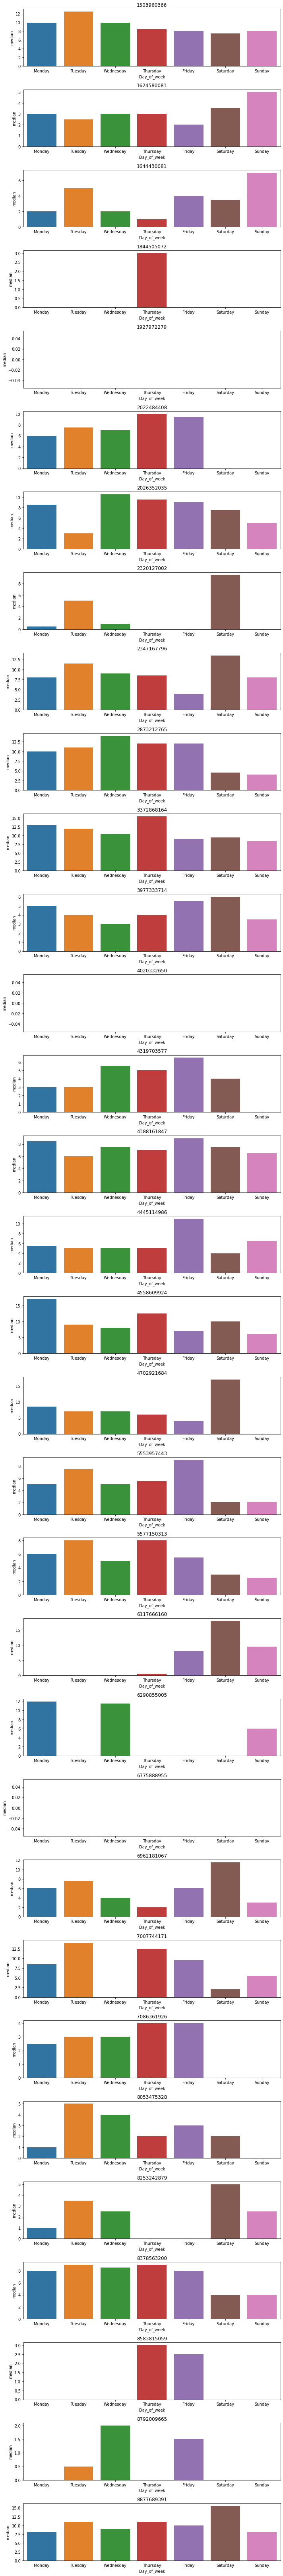

In [439]:
#I am not sure if I want to keep these plots
#but here we can see more customers with bad representations -1844505072,1927972279,4020332650,6775888955
#should I remove them?
fig, ax = plt.subplots(32,1, figsize=(10,90))
for index,user in enumerate(df_aggregated_int["Id"].unique()):
    sns.barplot(data=df_aggregated_int[df_aggregated_int["Id"]==user], x="Day_of_week",y="median",
             order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],ax=ax[index]).set_title(user);
plt.tight_layout()
plt.show()

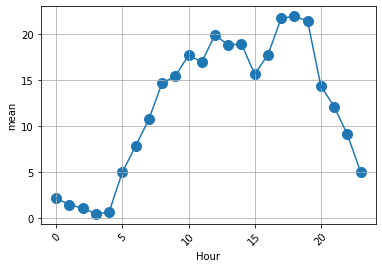

In [43]:
#it's aggregated plot for every customer, I grouped by Hour. 
#So we can see that the heart rate grows when they wake up. After there is a little growth in the afternoon and around 18
#probably after work.
df_aggregated_time =intensity.groupby(["Hour"])["TotalIntensity"].agg(["sum","median","mean","min","max"]).reset_index()
df_aggregated_time.head()
df_aggregated_time.plot.scatter(x = 'Hour', y = 'mean', s = 100)
plt.plot(df_aggregated_time['Hour'],df_aggregated_time['mean'])
plt.grid(zorder=0)
plt.xticks(rotation=45);
#this graph partly correlate the graph with the heart rate.Activity around lunch time and after work.

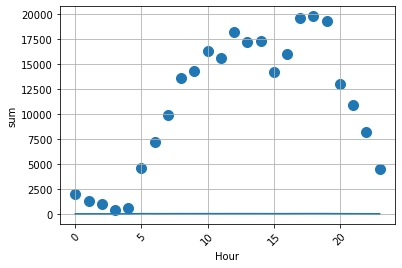

In [507]:
df_aggregated_time_cl =intensity_clean.groupby(["Hour"])["TotalIntensity"].agg(["sum","median","mean","min","max"]).reset_index()
df_aggregated_time_cl.head()
df_aggregated_time_cl.plot.scatter(x = 'Hour', y = 'sum', s = 100)
plt.plot(df_aggregated_time_cl['Hour'],df_aggregated_time_cl['mean'])
plt.grid(zorder=0)
plt.xticks(rotation=45);
#clean data (after removing 9000 rows) have the same graph as without cleaning.

In [44]:
df_aggregated_dayweek =intensity.groupby(["Day_of_week"])["TotalIntensity"].agg(["sum","median","mean","min","max"]).reset_index()
df_aggregated_dayweek
#all customers grouped

,Day_of_week,sum,median,mean,min,max
0,Friday,36136,4.0,12.122107,0,180
1,Monday,34653,3.0,12.112199,0,176
2,Saturday,37606,3.0,12.900858,0,180
3,Sunday,31809,1.0,10.983771,0,177
4,Thursday,39156,3.0,12.014728,0,165
5,Tuesday,44630,4.0,12.480425,0,173
6,Wednesday,41548,3.0,11.793358,0,178


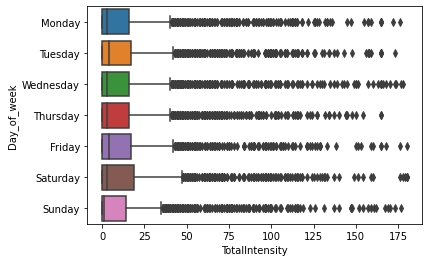

In [382]:
sns.boxplot(data=intensity,y="Day_of_week",x="TotalIntensity",
           order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]);
plt.show()

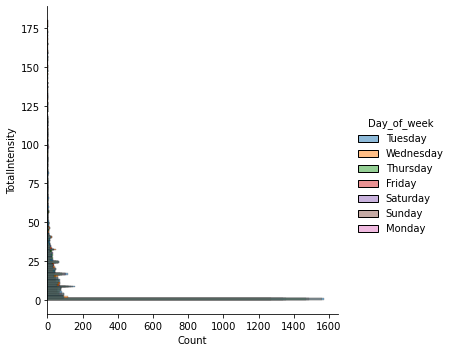

In [385]:
sns.displot(data=intensity,y="TotalIntensity",hue="Day_of_week");
plt.show()

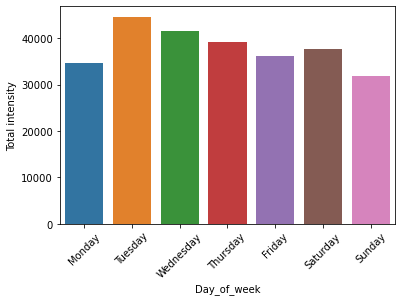

In [45]:
sns.barplot(data=df_aggregated_dayweek, x="Day_of_week",y="sum",
             order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]);
plt.xticks(rotation=45)
plt.ylabel('Total intensity');
#the most acctive day is Tuesday, the least active day is Sunday, we are looking at intensity 

## Working with the file steps. 33 participants

In [517]:
#this is the file with steps per hour. very interesting to check when people are the most active in steps.
#it can very with heart rate, I think
steps=pd.read_csv('../Data/raw/hourlySteps_merged.csv', parse_dates=[1],dayfirst=False)
steps.head()

,Id,ActivityHour,StepTotal
0,1503960366,2016-04-12 00:00:00,373
1,1503960366,2016-04-12 01:00:00,160
2,1503960366,2016-04-12 02:00:00,151
3,1503960366,2016-04-12 03:00:00,0
4,1503960366,2016-04-12 04:00:00,0


In [48]:
steps['ActivityHour']=pd.to_datetime(steps['ActivityHour'])

In [49]:
steps.isna().sum()

Id              0
ActivityHour    0
StepTotal       0
dtype: int64

In [50]:
steps.shape ##22099 rows

(22099, 3)

In [51]:
steps.drop_duplicates() #no duplicates

,Id,ActivityHour,StepTotal
0,1503960366,2016-04-12 00:00:00,373
1,1503960366,2016-04-12 01:00:00,160
2,1503960366,2016-04-12 02:00:00,151
3,1503960366,2016-04-12 03:00:00,0
4,1503960366,2016-04-12 04:00:00,0
...,...,...,...
22094,8877689391,2016-05-12 10:00:00,514
22095,8877689391,2016-05-12 11:00:00,1407
22096,8877689391,2016-05-12 12:00:00,3135
22097,8877689391,2016-05-12 13:00:00,307


In [52]:
steps['Id'].nunique()#info for all 33 participants

33

In [53]:
steps_by_id=steps.groupby(['Id']).count() #here we can see how many rows we have per customer.
#the 88 rows is relatevely small.same customer from the first table. 4057192912 
steps_by_id 

,ActivityHour,StepTotal
Id,,
1503960366,717,717
1624580081,736,736
1644430081,708,708
1844505072,731,731
1927972279,736,736
2022484408,736,736
2026352035,736,736
2320127002,735,735
2347167796,414,414


In [54]:
data_small_b = steps[(steps['Id'] == 4057192912)] #88 rows..remove?
#it's an Id with small value, not enough info
steps.shape ##22099 row

(22099, 3)

In [55]:
steps=steps.drop(data_small_b.index,axis=0)
steps.shape #88 crows dropped

(22011, 3)

In [57]:
steps['Hour']=steps['ActivityHour'].dt.hour
steps["Day_of_week"] = steps["ActivityHour"].dt.day_name()
steps.head()

,Id,ActivityHour,StepTotal,Hour,Day_of_week
0,1503960366,2016-04-12 00:00:00,373,0,Tuesday
1,1503960366,2016-04-12 01:00:00,160,1,Tuesday
2,1503960366,2016-04-12 02:00:00,151,2,Tuesday
3,1503960366,2016-04-12 03:00:00,0,3,Tuesday
4,1503960366,2016-04-12 04:00:00,0,4,Tuesday


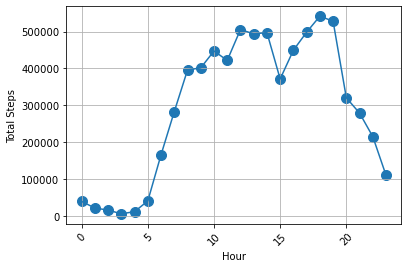

In [58]:
df_aggregated_hour =steps.groupby(["Hour"])['StepTotal'].agg(["sum","median","mean","min","max"]).reset_index()
df_aggregated_hour.head()
df_aggregated_hour.plot.scatter(x = 'Hour', y = 'sum', s = 100)
plt.plot(df_aggregated_hour['Hour'],df_aggregated_hour['sum'])
plt.grid(zorder=0)
plt.ylabel('Total Steps')
plt.xticks(rotation=45);
#there is an interesting drop of steps at 15:00.  

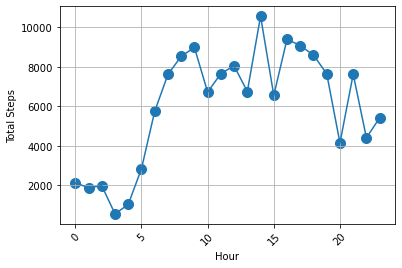

In [344]:
df_aggregated_hour =steps.groupby(["Hour"])['StepTotal'].agg(["sum","median","mean","min","max"]).reset_index()
df_aggregated_hour.head()
df_aggregated_hour.plot.scatter(x = 'Hour', y = 'max', s = 100)
plt.plot(df_aggregated_hour['Hour'],df_aggregated_hour['max'])
plt.grid(zorder=0)
plt.ylabel('Total Steps')
plt.xticks(rotation=45);
#there is an interesting drop of steps at 15:00.  

## Working with the file - sleep. 24 participants

In [518]:
sleep=pd.read_csv('../Data/raw/sleepDay_merged.csv', parse_dates=[1],dayfirst=False)
sleep.head()
#Number of recorded sleep periods for that day. Includes naps > 60min
#Hm... ineteresting. many people have naps?

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [403]:
sleep.isna().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [424]:
sleep.shape

(413, 5)

In [405]:
sleep.drop_duplicates() #410 rows, we had 3 duplicates

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712
...,...,...,...,...,...
408,8792009665,2016-04-30,1,343,360
409,8792009665,2016-05-01,1,503,527
410,8792009665,2016-05-02,1,415,423
411,8792009665,2016-05-03,1,516,545


In [406]:
sleep['Id'].nunique() # we have info about 24 participants. Later I will remove 9.

24

In [407]:
sleep.shape #413

(413, 5)

In [408]:
sleep_days_by_user = sleep.sort_values(by=["Id","SleepDay"]).groupby("Id").agg({"SleepDay":"count"}).reset_index()
sleep_days_by_user
#in this table we can see that file sleep misses a lot of data. Some customers had only few days of sleep.
#I can remove the rows with the amount of sleep day below ten.
#Because my idea was to see the connection between sleep and activity, and between sleep and calories..
#But it can be also smth that the company can work on. why so bad data? maybe it's not comfortable?

,Id,SleepDay
0,1503960366,25
1,1644430081,4
2,1844505072,3
3,1927972279,5
4,2026352035,28
5,2320127002,1
6,2347167796,15
7,3977333714,28
8,4020332650,8
9,4319703577,26


In [427]:
ids_to_discard = list(sleep_days_by_user[(sleep_days_by_user["SleepDay"]<10)]["Id"].values)
print(ids_to_discard)
#sleep_filtered = sleep[sleep['Id'].isin(ids_to_discard)==False].copy()
#sleep_filtered

[1644430081, 1844505072, 1927972279, 2320127002, 4020332650, 4558609924, 6775888955, 7007744171, 8053475328]


In [428]:
sleep_filtered = sleep[sleep['Id'].isin(ids_to_discard)==False]
sleep_filtered.shape

(379, 5)

In [509]:
sleep_filtered.to_csv("../Data/cleaned/filteres_sleep.csv",index=False)

## I try to do here some statistics

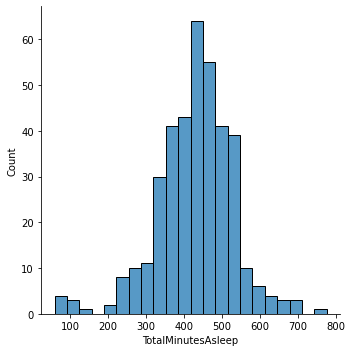

In [274]:
sns.displot(sleep,x='TotalMinutesAsleep')

In [278]:
sample_mean = np.mean(sleep['TotalMinutesAsleep'])
sample_mean

428.63324538258576

In [276]:
# we can find a confidence interval for the population based on our sample
import scipy.stats

confidence_level = 0.95
degrees_freedom = len(sleep['TotalMinutesAsleep']) - 1  # or, for large values of sample size, just use that
sample_mean = np.mean(sleep['TotalMinutesAsleep'])
# note that we use the standard error of the sample 
# as an estimate of the standard error of the population (which is used in the theoretical formula)
sample_standard_error = scipy.stats.sem(sleep['TotalMinutesAsleep']) # sem = standard error of the mean = std(mean)/sqrt(samplesize)

confidence_interval = scipy.stats.t.interval(confidence_level, 
                                             degrees_freedom, 
                                             sample_mean, 
                                             sample_standard_error)
print( 'confidence interval is ', confidence_interval, '.' )
#The mean sleep of population is 428 minutes =7,13 hours and it will be in the interval 418 -438 in 95% cases.
#418 =6.9 hours, 438 - 7.3 hours. 

confidence interval is  (418.47096437118034, 438.79552639399117) .


In [68]:
sleep["Day_of_week"] = sleep["SleepDay"].dt.day_name()
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Day_of_week
0,1503960366,2016-04-12,1,327,346,Tuesday
1,1503960366,2016-04-13,2,384,407,Wednesday
2,1503960366,2016-04-15,1,412,442,Friday
3,1503960366,2016-04-16,2,340,367,Saturday
4,1503960366,2016-04-17,1,700,712,Sunday


In [69]:
df_aggregated_dayweek_sleep =sleep.groupby(["Day_of_week"])["TotalMinutesAsleep"].agg(["sum","median","mean","min","max"]).reset_index()
df_aggregated_dayweek_sleep

,Day_of_week,sum,median,mean,min,max
0,Friday,20924,411.0,410.274510,82,658
1,Monday,18889,433.0,410.630435,62,535
2,Saturday,22939,462.0,449.784314,235,775
3,Sunday,23514,503.0,479.877551,98,700
4,Thursday,25213,428.0,413.327869,59,545
5,Tuesday,23881,417.0,404.762712,219,550
6,Wednesday,27092,444.5,436.967742,152,658


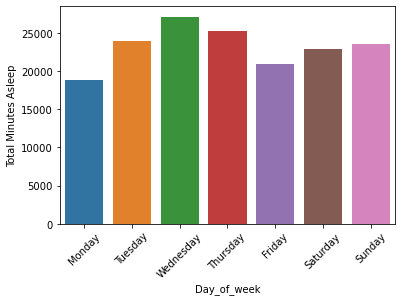

In [118]:
sns.barplot(data=df_aggregated_dayweek_sleep, x="Day_of_week",y="sum",
             order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]);
plt.xticks(rotation=45)
plt.ylabel('Total Minutes Asleep');
#people sleep the most on Sunday when the data is mean, and by sum on Wesnesday.
#Does it mean activity on Tuesday help the sleep on Wednesday?
#worth to analyze more
#but in general we have a lot of missing data for nights. what can tell us - people don't like wearing it during nights.
#I should be more careful. first time I looked at sum and it wasn't representative. as we have people providing different 
#days of sleep.Mean is better. Maybe I should take back the 9 rows I removed, because for mean they will be fine.

In [71]:
df_aggregated_dayweek_id =sleep.groupby(["Id"])["TotalMinutesAsleep"].agg(['count',"sum","median","mean","min","max"]).reset_index()
df_aggregated_dayweek_id
#interesting to plot some of this data

,Id,count,sum,median,mean,min,max
0,1503960366,25,9007,340.0,360.280000,245,700
1,2026352035,28,14173,516.5,506.178571,357,573
2,2347167796,15,6702,445.0,446.800000,374,556
3,3977333714,28,8222,291.5,293.642857,152,424
4,4319703577,26,12393,493.5,476.653846,59,692
5,4388161847,24,9675,433.5,403.125000,62,619
6,4445114986,28,10785,403.0,385.178571,98,502
7,4702921684,28,11792,423.0,421.142857,253,591
8,5553957443,31,14368,438.0,463.483871,322,775
9,5577150313,26,11232,427.5,432.000000,74,603


In [76]:
# for this df: df_aggregated_dayweek_id. The mean shows more enough!....but that's actually the problem of mean.
#big value sums with the small and things are ok. but not in real.
labels = ["Not enough", "Enough", "Too much"]
bins1 = pd.cut(df_aggregated_dayweek_id['mean'],[0,420,540,1000], labels = labels)
bins1.value_counts(dropna=False)

Enough        11
Not enough     4
Too much       0
Name: mean, dtype: int64

In [72]:
# cut in 3 designed bins.  420 - is 7hours*60minutes. by health system it's count as a good sleep. 540-is 9 hours in minutes
#this is graph with all id,day by day.I will try to plot it when it's grouped by id with mean sleep
labels = ["Not enough", "Enough", "Too much"]
bins1 = pd.cut(sleep['TotalMinutesAsleep'],[0,420,540,1000], labels = labels)
bins1.value_counts(dropna=False)
#people don't sleep enough

Enough        185
Not enough    160
Too much       34
Name: TotalMinutesAsleep, dtype: int64

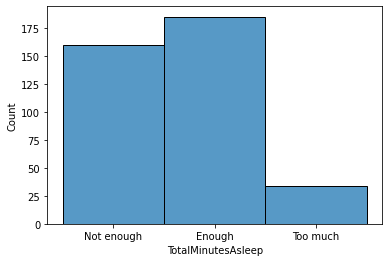

In [73]:
sns.histplot(bins1)
plt.show()

In [80]:
#here I filter the days, no grouping where the totalminuteasleep is less than 420 minutes
not_enough_sleep=sleep[(sleep['TotalMinutesAsleep']<420)]
not_enough_sleep

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Day_of_week
0,1503960366,2016-04-12,1,327,346,Tuesday
1,1503960366,2016-04-13,2,384,407,Wednesday
2,1503960366,2016-04-15,1,412,442,Friday
3,1503960366,2016-04-16,2,340,367,Saturday
5,1503960366,2016-04-19,1,304,320,Tuesday
...,...,...,...,...,...,...
404,8792009665,2016-04-23,1,339,360,Saturday
406,8792009665,2016-04-28,1,402,416,Thursday
407,8792009665,2016-04-29,1,398,406,Friday
408,8792009665,2016-04-30,1,343,360,Saturday


In [81]:
#the data frame from above I group by dayofweek to see which day people sleep the least. It's Monday night. 
#interesting enough on Tuesday people sleep well, and they are more active on Tuesday.
df_not_enough_sleep =not_enough_sleep.groupby(["Day_of_week"])["TotalMinutesAsleep"].agg(["sum","median","mean","min","max"]).reset_index()
df_not_enough_sleep

,Day_of_week,sum,median,mean,min,max
0,Friday,9231,363.0,341.888889,82,412
1,Monday,6424,355.0,321.200000,62,415
2,Saturday,7235,357.0,344.523810,235,412
3,Sunday,4378,361.0,336.769231,98,411
4,Thursday,9262,381.0,343.037037,59,419
5,Tuesday,11116,354.0,347.375000,219,419
6,Wednesday,6433,354.0,338.578947,152,418


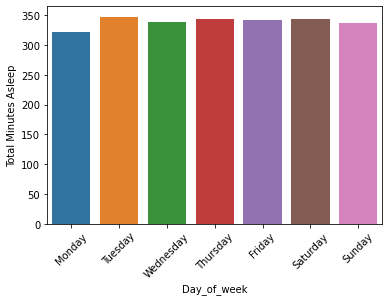

In [115]:
#MEAN HOURS of SLEEP. NOT enough sleep group
sns.barplot(data=df_not_enough_sleep, x="Day_of_week",y="mean",
             order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]);
plt.xticks(rotation=45)
plt.ylabel('Total Minutes Asleep');
#interesting enough on Tuesday people sleep well, and they are more active on Tuesday.


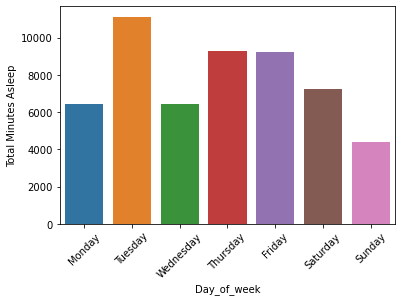

In [116]:
#SUM HOURS of SLEEP. NOT enough sleep group
sns.barplot(data=df_not_enough_sleep, x="Day_of_week",y="sum",
             order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]);
plt.xticks(rotation=45)
plt.ylabel('Total Minutes Asleep. Group that does NOT sleep enough');
#interesting enough on Tuesday people sleep well, and they are more active on Tuesday.
#But Sunday is quite low...why? I remember that we don't have even data for some users.

In [85]:
df_not_enough_sleep_id =not_enough_sleep.groupby(["Id"])["TotalMinutesAsleep"].agg(['count',"sum","median","mean","min","max"]).reset_index()
df_not_enough_sleep_id
#here I added count, to see how many night each person has lack of sleep.
#one third group is more than 50% nights undersleep. others -just few nights.
#now very interesting to merge this with intensity table.
#so I think regarding this data set, people do sleep enough, just some people always sleep less, 
#and they make a difference for undersleeping group being bigger 

,Id,count,sum,median,mean,min,max
0,1503960366,22,7283,336.0,331.045455,245,412
1,2026352035,1,357,357.0,357.000000,357,357
2,2347167796,4,1598,406.5,399.500000,374,411
3,3977333714,27,7798,291.0,288.814815,152,412
4,4319703577,3,647,286.0,215.666667,59,302
5,4388161847,9,2412,329.0,268.000000,62,409
6,4445114986,17,5736,361.0,337.411765,98,419
7,4702921684,13,4813,384.0,370.230769,253,416
8,5553957443,13,4947,380.0,380.538462,322,419
9,5577150313,11,3933,384.0,357.545455,74,419


In [102]:
df_aggregated_intens_id =intensity.groupby(["Id"])["TotalIntensity"].agg(["sum","median","mean","min","max"]).reset_index()
df_aggregated_intens_id.head()

,Id,sum,median,mean,min,max
0,1503960366,11594,9.0,16.170153,0,159
1,1624580081,5917,3.0,8.039402,0,169
2,1644430081,7448,3.0,10.519774,0,130
3,1844505072,3671,0.0,5.021888,0,67
4,1927972279,1367,0.0,1.857337,0,63


In [103]:
merged_sleep_ne_intensity = pd.merge(df_not_enough_sleep_id, df_aggregated_intens_id, how="inner", on=["Id"])
merged_sleep_ne_intensity.head()
#y - is intnesity, x-is sleep

,Id,count,sum_x,median_x,mean_x,min_x,max_x,sum_y,median_y,mean_y,min_y,max_y
0,1503960366,22,7283,336.0,331.045455,245,412,11594,9.0,16.170153,0,159
1,2026352035,1,357,357.0,357.000000,357,357,7958,8.0,10.812500,0,56
2,2347167796,4,1598,406.5,399.500000,374,411,6012,8.5,14.521739,0,132
3,3977333714,27,7798,291.0,288.814815,152,412,10599,4.5,15.228448,0,147
4,4319703577,3,647,286.0,215.666667,59,302,8189,3.0,11.310773,0,87


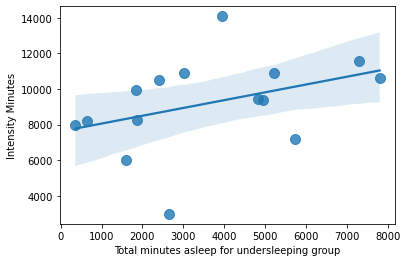

In [101]:
import seaborn as sns
sns.regplot(x = 'sum_x', y = 'sum_y', data = merged_sleep_ne_intensity, marker='o',scatter_kws={'s':100})
plt.ylabel('Intensity Minutes');
plt.xlabel('Total minutes asleep for undersleeping group');
plt.show()
#Plot data and a linear regression model fit.

In [104]:
#here I filter the days (no grouping) where the totalminuteasleep is more than 420 minutes and less than 540
enough_sleep=sleep[(sleep['TotalMinutesAsleep']>=420)&(sleep['TotalMinutesAsleep']<540)]
enough_sleep

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Day_of_week
9,1503960366,2016-04-24,1,430,449,Sunday
37,2026352035,2016-04-12,1,503,546,Tuesday
38,2026352035,2016-04-13,1,531,565,Wednesday
40,2026352035,2016-04-15,1,523,573,Friday
41,2026352035,2016-04-16,1,524,567,Saturday
...,...,...,...,...,...,...
402,8792009665,2016-04-20,1,528,547,Wednesday
405,8792009665,2016-04-27,1,423,428,Wednesday
409,8792009665,2016-05-01,1,503,527,Sunday
411,8792009665,2016-05-03,1,516,545,Tuesday


In [108]:
#the data frame from above I group by dayofweek to see which day people sleep the least and the best
#interesting enough on Tuesday people sleep well, and they are more active on Tuesday.
df_enough_sleep =enough_sleep.groupby(["Day_of_week"])["TotalMinutesAsleep"].agg(["sum","median","mean","min","max"]).reset_index()
df_enough_sleep

,Day_of_week,sum,median,mean,min,max
0,Friday,10435,462.0,474.318182,424,533
1,Monday,12465,488.5,479.423077,421,535
2,Saturday,11206,490.0,487.217391,422,530
3,Sunday,8122,480.0,477.764706,427,529
4,Thursday,15406,467.0,466.848485,421,535
5,Tuesday,12215,467.0,469.807692,421,516
6,Wednesday,18226,454.0,467.333333,420,538


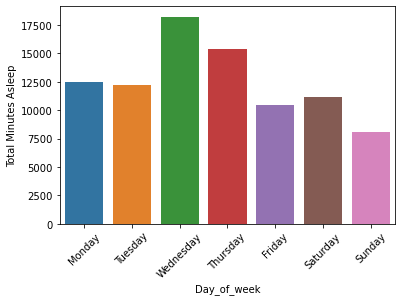

In [106]:
#The SUM hours of sleep for group that sleep enough
sns.barplot(data=df_enough_sleep, x="Day_of_week",y="sum",
             order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]);
plt.xticks(rotation=45)
plt.ylabel('Total Minutes Asleep');
#I built a graph for sum, mean is dangerous. it's group with enough sleep.People sleep the most on Wednesday night.
#And as it's a group of enough sleep, we can see that Sunday is not the most long hours of sleep

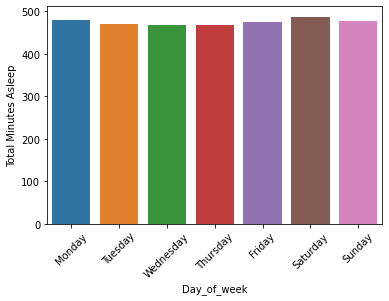

In [119]:
#The MEAN hours of sleep for group that sleep enough
sns.barplot(data=df_enough_sleep, x="Day_of_week",y="mean",
             order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]);
plt.xticks(rotation=45)
plt.ylabel('Total Minutes Asleep');
#very even

In [110]:
df_enough_sleep_id =enough_sleep.groupby(["Id"])["TotalMinutesAsleep"].agg(['count',"sum","median","mean","min","max"]).reset_index()
df_enough_sleep_id

,Id,count,sum,median,mean,min,max
0,1503960366,1,430,430.0,430.000000,430,430
1,2026352035,23,11602,511.0,504.434783,437,538
2,2347167796,10,4548,450.0,454.800000,433,500
3,3977333714,1,424,424.0,424.000000,424,424
4,4319703577,21,10452,497.0,497.714286,450,535
5,4388161847,12,5545,470.0,462.083333,421,529
6,4445114986,11,5049,457.0,459.000000,429,502
7,4702921684,14,6388,448.0,456.285714,421,520
8,5553957443,11,4963,447.0,451.181818,421,520
9,5577150313,12,5604,454.0,467.000000,421,527


In [111]:
merged_enough_sleep_intensity = pd.merge(df_enough_sleep_id, df_aggregated_intens_id, how="inner", on=["Id"])
merged_enough_sleep_intensity
#x-sleep,y-intensity

,Id,count,sum_x,median_x,mean_x,min_x,max_x,sum_y,median_y,mean_y,min_y,max_y
0,1503960366,1,430,430.0,430.000000,430,430,11594,9.0,16.170153,0,159
1,2026352035,23,11602,511.0,504.434783,437,538,7958,8.0,10.812500,0,56
2,2347167796,10,4548,450.0,454.800000,433,500,6012,8.5,14.521739,0,132
3,3977333714,1,424,424.0,424.000000,424,424,10599,4.5,15.228448,0,147
4,4319703577,21,10452,497.0,497.714286,450,535,8189,3.0,11.310773,0,87
5,4388161847,12,5545,470.0,462.083333,421,529,10519,7.0,14.311565,0,154
6,4445114986,11,5049,457.0,459.000000,429,502,7198,6.0,9.793197,0,137
7,4702921684,14,6388,448.0,456.285714,421,520,9453,6.0,12.931601,0,119
8,5553957443,11,4963,447.0,451.181818,421,520,9376,4.5,12.843836,0,144
9,5577150313,12,5604,454.0,467.000000,421,527,14086,5.0,19.895480,0,180


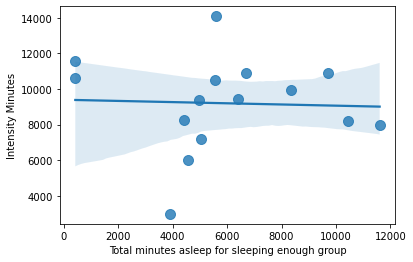

In [112]:
sns.regplot(x = 'sum_x', y = 'sum_y', data = merged_enough_sleep_intensity, marker='o',scatter_kws={'s':100})
plt.ylabel('Intensity Minutes');
plt.xlabel('Total minutes asleep for sleeping enough group');
plt.show()
#sleeping enough people are not more active. Interesting!

In [125]:
#I want to concatenate the sleep and the steps tables.let's try
merged = pd.merge(sleep, steps, how="inner", on=["Id"])
merged.head()
#we had 33 id for steps and 14 for sleep

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Day_of_week_x,ActivityHour,StepTotal,Hour,Day_of_week_y
0,1503960366,2016-04-12,1,327,346,Tuesday,2016-04-12 00:00:00,373,0,Tuesday
1,1503960366,2016-04-12,1,327,346,Tuesday,2016-04-12 01:00:00,160,1,Tuesday
2,1503960366,2016-04-12,1,327,346,Tuesday,2016-04-12 02:00:00,151,2,Tuesday
3,1503960366,2016-04-12,1,327,346,Tuesday,2016-04-12 03:00:00,0,3,Tuesday
4,1503960366,2016-04-12,1,327,346,Tuesday,2016-04-12 04:00:00,0,4,Tuesday


In [151]:
merged_id =merged.groupby(["Id"])['TotalMinutesAsleep','StepTotal'].agg(["sum","median","mean","min","max"]).reset_index()
merged_id.head()

C:\Users\tanya\AppData\Local\Temp\ipykernel_10444\1383646526.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  merged_id =merged.groupby(["Id"])['TotalMinutesAsleep','StepTotal'].agg(["sum","median","mean","min","max"]).reset_index()


Id TotalMinutesAsleep                              StepTotal  \
                             sum median        mean  min  max       sum   
0  1503960366            6458019  340.0  360.280000  245  700   9363650   
1  2026352035           10431328  516.5  506.178571  357  573   4817904   
2  2347167796            2774628  445.0  446.800000  374  556   2570055   
3  3977333714            5722512  291.5  293.642857  152  424   9190832   
4  4319703577            8972532  493.5  476.653846   59  692   5446064   

                                
  median        mean min   max  
0  178.0  522.379358   0  5934  
1  117.0  233.788043   0  2375  
2  130.5  413.857488   0  5291  
3   79.5  471.614943   0  5414  
4   49.5  289.314917   0  3547

In [152]:
#here we want to rename the columns. in the table above we can wee that it's multiindex. and I want to make a graph with 
#2 sums of Total Sleep and Total steps. elem[0] is the first element of list names and elem[1] -the second
merged_id.columns = [elem[0]+"_"+elem[1] if (elem[1] != "") else elem[0] for elem in list(merged_id.columns)]
list(merged_id.columns)
#merged_id.head()
#don't run this cell twice, it will mess up names of columns

['Id',
 'TotalMinutesAsleep_sum',
 'TotalMinutesAsleep_median',
 'TotalMinutesAsleep_mean',
 'TotalMinutesAsleep_min',
 'TotalMinutesAsleep_max',
 'StepTotal_sum',
 'StepTotal_median',
 'StepTotal_mean',
 'StepTotal_min',
 'StepTotal_max']

In [154]:
merged_id.head()

,Id,TotalMinutesAsleep_sum,TotalMinutesAsleep_median,TotalMinutesAsleep_mean,TotalMinutesAsleep_min,TotalMinutesAsleep_max,StepTotal_sum,StepTotal_median,StepTotal_mean,StepTotal_min,StepTotal_max
0,1503960366,6458019,340.0,360.280000,245,700,9363650,178.0,522.379358,0,5934
1,2026352035,10431328,516.5,506.178571,357,573,4817904,117.0,233.788043,0,2375
2,2347167796,2774628,445.0,446.800000,374,556,2570055,130.5,413.857488,0,5291
3,3977333714,5722512,291.5,293.642857,152,424,9190832,79.5,471.614943,0,5414
4,4319703577,8972532,493.5,476.653846,59,692,5446064,49.5,289.314917,0,3547


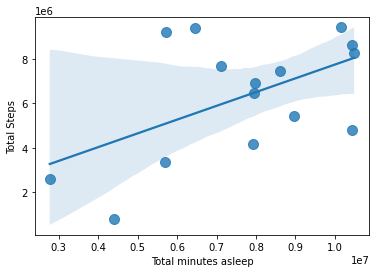

In [347]:
sns.regplot(x = 'TotalMinutesAsleep_sum', y = 'StepTotal_sum', data = merged_id, marker='o',scatter_kws={'s':100})
plt.ylabel('Total Steps');
plt.xlabel('Total minutes asleep');
plt.show()
#We can see here the regression line between minutes asleep and total steps.
#The more sleep the better!

In [ ]:
merged['Id'].nunique()

## Working with the file weight. 8 participants

In [519]:
weight=pd.read_csv('../Data/raw/weightLogInfo_merged.csv', parse_dates=[1],dayfirst=False)
#weight['Id'].nunique() #we have info about weight of only 8 customers
weight.head()


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,2016-05-12 23:59:59,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [235]:
aggr_weight =weight.groupby(["Id", 'Date'])['WeightKg'].agg(['min','max']).reset_index()
aggr_weight.head()
#[''].agg(["sum","median","mean","min","max"]).reset_ind

,Id,Date,min,max
0,1503960366,2016-05-02 23:59:59,52.599998,52.599998
1,1503960366,2016-05-03 23:59:59,52.599998,52.599998
2,1927972279,2016-04-13 01:08:52,133.500000,133.500000
3,2873212765,2016-04-21 23:59:59,56.700001,56.700001
4,2873212765,2016-05-12 23:59:59,57.299999,57.299999


In [256]:
#How to fix it. first write a decision for 1 client,we took id and made empty dict-y user_loss = {"Id": [], "Weight_change": []}
#for user in aggr_weight['Id'].unique():
 #   user_loss["Id"].append(user) #here we add the iser in id, it's a key
  #  user_loss["Weight_change"].append(aggr_weight[aggr_weight['Id']==user].iloc[-1,2] - aggr_weight[aggr_weight['Id']==user].iloc[0,2])

#user_loss_df = pd.DataFrame(user_loss) 
#aggr_weight[aggr_weight['Id']==8877689391]
#iloc[-1,2] - gave us the last row(it's -1) and the value with weight - (it's 2)
#iloc[0,2] - gave us the first row for each client, and 2-gives us again the value of weight
#instead of user we had the actual id and we saw that it's counting right thing.
#after we made an empty dictionary and we made a cycle for each unique id.
#aggr_weight[aggr_weight['Id']==user].iloc[-1,2] - aggr_weight[aggr_weight['Id']==user].iloc[0,2])

In [259]:
user_loss = {"Id": [], "Weight_change": []}
for user in aggr_weight['Id'].unique():
    user_loss["Id"].append(user)
    user_loss["Weight_change"].append(aggr_weight[aggr_weight['Id']==user].iloc[-1,2] - aggr_weight[aggr_weight['Id']==user].iloc[0,2])

user_loss_df = pd.DataFrame(user_loss)
user_loss_df
#this is a new data frame, with only 5 variables we can use.

,Id,Weight_change
0,1503960366,0.000000
1,1927972279,0.000000
2,2873212765,0.599998
3,4319703577,-0.099998
4,4558609924,-0.599998
5,5577150313,0.000000
6,6962181067,-0.599998
7,8877689391,-1.800003


In [510]:
user_loss_df.to_csv("../Data/cleaned/user_loss_weight.csv",index=False)

In [260]:
# merge sleep and user_loss dataframe
merged_weight = pd.merge(sleep, user_loss_df, how="inner", on=["Id"])
merged_weight.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Day_of_week,Weight_change
0,1503960366,2016-04-12,1,327,346,Tuesday,0.0
1,1503960366,2016-04-13,2,384,407,Wednesday,0.0
2,1503960366,2016-04-15,1,412,442,Friday,0.0
3,1503960366,2016-04-16,2,340,367,Saturday,0.0
4,1503960366,2016-04-17,1,700,712,Sunday,0.0


In [261]:
#group by Id, and check the total sleep and weight change
merged_weight_id =merged_weight.groupby(["Id"])['TotalMinutesAsleep','Weight_change'].agg(["sum","median","mean","min","max"]).reset_index()
merged_weight_id.head()

C:\Users\tanya\AppData\Local\Temp\ipykernel_10444\1601504799.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  merged_weight_id =merged_weight.groupby(["Id"])['TotalMinutesAsleep','Weight_change'].agg(["sum","median","mean","min","max"]).reset_index()


Id TotalMinutesAsleep                              Weight_change  \
                             sum median        mean  min  max           sum   
0  1503960366               9007  340.0  360.280000  245  700      0.000000   
1  4319703577              12393  493.5  476.653846   59  692     -2.599960   
2  5577150313              11232  427.5  432.000000   74  603      0.000000   
3  6962181067              13888  442.0  448.000000  298  630    -18.599953   

                                           
     median      mean       min       max  
0  0.000000  0.000000  0.000000  0.000000  
1 -0.099998 -0.099998 -0.099998 -0.099998  
2  0.000000  0.000000  0.000000  0.000000  
3 -0.599998 -0.599998 -0.599998 -0.599998

In [262]:
#adjusting again the name of columns to be able to build a graph
merged_weight_id.columns = [elem[0]+"_"+elem[1] if (elem[1] != "") else elem[0] for elem in list(merged_weight_id.columns)]
list(merged_weight_id.columns)

['Id',
 'TotalMinutesAsleep_sum',
 'TotalMinutesAsleep_median',
 'TotalMinutesAsleep_mean',
 'TotalMinutesAsleep_min',
 'TotalMinutesAsleep_max',
 'Weight_change_sum',
 'Weight_change_median',
 'Weight_change_mean',
 'Weight_change_min',
 'Weight_change_max']

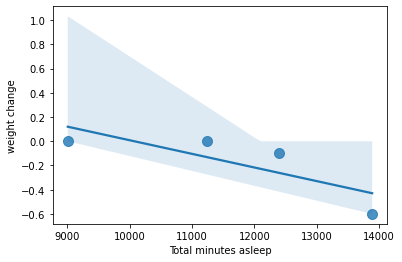

In [264]:
sns.regplot(x = 'TotalMinutesAsleep_sum', y = 'Weight_change_mean', data = merged_weight_id, marker='o',scatter_kws={'s':100})
plt.ylabel('weight change');
plt.xlabel('Total minutes asleep');
plt.show()
#we didn't have a big set of weight, but for 4 participants, interesting enough, there is a trend - the more you sleep
#the more you lose weight.

## Working with the file Calories. 

In [520]:
calories=pd.read_csv('../Data/raw/dailyCalories_merged.csv', parse_dates=[1],dayfirst=False)
calories
#I decided to do similar thing as I did for sleep and steps, to see the connection between sleep hours and calories.

,Id,ActivityDay,Calories
0,1503960366,2016-04-12,1985
1,1503960366,2016-04-13,1797
2,1503960366,2016-04-14,1776
3,1503960366,2016-04-15,1745
4,1503960366,2016-04-16,1863
...,...,...,...
935,8877689391,2016-05-08,2847
936,8877689391,2016-05-09,3710
937,8877689391,2016-05-10,2832
938,8877689391,2016-05-11,3832


In [511]:
calories.isna().sum()

Id             0
ActivityDay    0
Calories       0
dtype: int64

In [512]:
calories.shape

(940, 3)

In [513]:
calories.drop_duplicates() #no dulpicates

,Id,ActivityDay,Calories
0,1503960366,2016-04-12,1985
1,1503960366,2016-04-13,1797
2,1503960366,2016-04-14,1776
3,1503960366,2016-04-15,1745
4,1503960366,2016-04-16,1863
...,...,...,...
935,8877689391,2016-05-08,2847
936,8877689391,2016-05-09,3710
937,8877689391,2016-05-10,2832
938,8877689391,2016-05-11,3832


In [225]:
#merging sleep and calories tables, by Id
merged_sleep_cal = pd.merge(sleep, calories, how="inner", on=["Id"])
merged_sleep_cal.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Day_of_week,ActivityDay,Calories
0,1503960366,2016-04-12,1,327,346,Tuesday,2016-04-12,1985
1,1503960366,2016-04-12,1,327,346,Tuesday,2016-04-13,1797
2,1503960366,2016-04-12,1,327,346,Tuesday,2016-04-14,1776
3,1503960366,2016-04-12,1,327,346,Tuesday,2016-04-15,1745
4,1503960366,2016-04-12,1,327,346,Tuesday,2016-04-16,1863


In [226]:
#grouping by Id, but I want to see aggregated data of TotalMinutesAsleep and Calories
merged_sleep_cal_id =merged_sleep_cal.groupby(["Id"])['TotalMinutesAsleep','Calories'].agg(["sum","median","mean","min","max"]).reset_index()
merged_sleep_cal_id.head()

C:\Users\tanya\AppData\Local\Temp\ipykernel_10444\1626410215.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  merged_sleep_cal_id =merged_sleep_cal.groupby(["Id"])['TotalMinutesAsleep','Calories'].agg(["sum","median","mean","min","max"]).reset_index()


Id TotalMinutesAsleep                              Calories  \
                             sum median        mean  min  max      sum   
0  1503960366             279217  340.0  360.280000  245  700  1407725   
1  2026352035             439363  516.5  506.178571  357  573  1337280   
2  2347167796             120636  445.0  446.800000  374  556   551730   
3  3977333714             246660  291.5  293.642857  152  424  1271480   
4  4319703577             384183  493.5  476.653846   59  692  1642368   

                                    
   median         mean   min   max  
0  1837.0  1816.419355     0  2159  
1  1521.0  1540.645161  1141  1926  
2  2071.5  2043.444444   403  2670  
3  1572.0  1513.666667    52  1760  
4  2175.0  2037.677419   257  2530

In [227]:
#here I am looking at multi-index of my dataframe.In the next cell we change the name that has 2 parts into 1 name
list(merged_sleep_cal_id.columns)

[('Id', ''),
 ('TotalMinutesAsleep', 'sum'),
 ('TotalMinutesAsleep', 'median'),
 ('TotalMinutesAsleep', 'mean'),
 ('TotalMinutesAsleep', 'min'),
 ('TotalMinutesAsleep', 'max'),
 ('Calories', 'sum'),
 ('Calories', 'median'),
 ('Calories', 'mean'),
 ('Calories', 'min'),
 ('Calories', 'max')]

In [228]:
#we add _between the first part of the name and the second. in Id, there is no second part, so we give back only first elem.
merged_sleep_cal_id.columns = [elem[0]+"_"+elem[1] if (elem[1] != "") else elem[0] for elem in list(merged_sleep_cal_id.columns)]


In [229]:
merged_sleep_cal_id

,Id,TotalMinutesAsleep_sum,TotalMinutesAsleep_median,TotalMinutesAsleep_mean,TotalMinutesAsleep_min,TotalMinutesAsleep_max,Calories_sum,Calories_median,Calories_mean,Calories_min,Calories_max
0,1503960366,279217,340.0,360.280000,245,700,1407725,1837.0,1816.419355,0,2159
1,2026352035,439363,516.5,506.178571,357,573,1337280,1521.0,1540.645161,1141,1926
2,2347167796,120636,445.0,446.800000,374,556,551730,2071.5,2043.444444,403,2670
3,3977333714,246660,291.5,293.642857,152,424,1271480,1572.0,1513.666667,52,1760
4,4319703577,384183,493.5,476.653846,59,692,1642368,2175.0,2037.677419,257,2530
5,4388161847,299925,433.5,403.125000,62,619,2301840,3069.0,3093.870968,1623,4022
6,4445114986,334335,403.0,385.178571,98,502,1897616,2196.0,2186.193548,1212,2499
7,4702921684,365552,423.0,421.142857,253,591,2574096,3006.0,2965.548387,1240,3691
8,5553957443,445408,438.0,463.483871,322,775,1802526,1922.0,1875.677419,741,2335
9,5577150313,336960,427.5,432.000000,74,603,2620514,3389.5,3359.633333,1665,4552


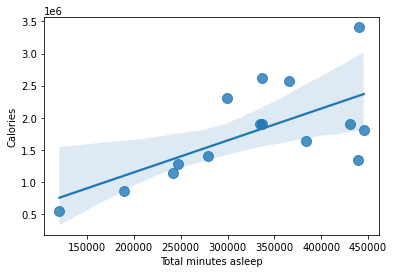

In [230]:
#Building a plot that looks for regression model between calories and sleep.
#good sleep is important!
sns.regplot(x = 'TotalMinutesAsleep_sum', y = 'Calories_sum', data = merged_sleep_cal_id, marker='o',scatter_kws={'s':100})
plt.ylabel('Calories');
plt.xlabel('Total minutes asleep');
plt.show()